In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ariel-data-challenge-2025/axis_info.parquet
/kaggle/input/ariel-data-challenge-2025/sample_submission.csv
/kaggle/input/ariel-data-challenge-2025/test_star_info.csv
/kaggle/input/ariel-data-challenge-2025/train.csv
/kaggle/input/ariel-data-challenge-2025/wavelengths.csv
/kaggle/input/ariel-data-challenge-2025/train_star_info.csv
/kaggle/input/ariel-data-challenge-2025/adc_info.csv
/kaggle/input/ariel-data-challenge-2025/test/1103775/AIRS-CH0_signal_1.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/FGS1_signal_0.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/FGS1_signal_1.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/AIRS-CH0_signal_0.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/AIRS-CH0_calibration_0/dead.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/AIRS-CH0_calibration_0/linear_corr.parquet
/kaggle/input/ariel-data-challenge-2025/test/1103775/AIRS-CH0_calibration_0/read.parquet
/kaggle/input/ariel-

In [2]:
path_folder = '/kaggle/input/ariel-data-challenge-2025/' 
path_out = '/kaggle/tmp/data_light_raw/' 
output_dir = '/kaggle/tmp/data_light_raw/' 

In [3]:
import os
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from tqdm import tqdm


In [4]:
adc_info = pd.read_csv(f'{path_folder}/adc_info.csv')
print(adc_info.columns)
print(adc_info.head())

Index(['FGS1_adc_offset', 'FGS1_adc_gain', 'AIRS-CH0_adc_offset',
       'AIRS-CH0_adc_gain'],
      dtype='object')
   FGS1_adc_offset  FGS1_adc_gain  AIRS-CH0_adc_offset  AIRS-CH0_adc_gain
0          -1000.0         0.4369              -1000.0             0.4369


In [5]:
adc_info = pd.read_csv(f'{path_folder}/adc_info.csv')

# AIRS-CH0 
airs_gain = adc_info['AIRS-CH0_adc_gain'].values[0]
airs_offset = adc_info['AIRS-CH0_adc_offset'].values[0]

# FGS1 
fgs_gain = adc_info['FGS1_adc_gain'].values[0]
fgs_offset = adc_info['FGS1_adc_offset'].values[0]

print(f"AIRS-CH0 Gain: {airs_gain}, Offset: {airs_offset}")
print(f"FGS1 Gain: {fgs_gain}, Offset: {fgs_offset}")


AIRS-CH0 Gain: 0.4369, Offset: -1000.0
FGS1 Gain: 0.4369, Offset: -1000.0


In [6]:
import pyarrow.parquet as pq

axis_info = pq.read_table(f"{path_folder}/axis_info.parquet").to_pandas()
print(axis_info.head())

   AIRS-CH0-axis0-h  AIRS-CH0-axis2-um  AIRS-CH0-integration_time  \
0          0.000028           4.078463                        0.1   
1          0.000056           4.074023                        4.5   
2          0.001361           4.069568                        0.1   
3          0.001389           4.065100                        4.5   
4          0.002694           4.060618                        0.1   

   FGS1-axis0-h  
0      0.000028  
1      0.000056  
2      0.000139  
3      0.000167  
4      0.000250  


In [7]:
print(axis_info.columns)

Index(['AIRS-CH0-axis0-h', 'AIRS-CH0-axis2-um', 'AIRS-CH0-integration_time',
       'FGS1-axis0-h'],
      dtype='object')


In [8]:
axis_info['AIRS-CH0-axis0-h-calibrated'] = (
    axis_info['AIRS-CH0-axis0-h'] * airs_gain + airs_offset
)

axis_info['FGS1-axis0-h-calibrated'] = (
    axis_info['FGS1-axis0-h'] * fgs_gain + fgs_offset
)

In [9]:
print(axis_info[['AIRS-CH0-axis0-h', 'AIRS-CH0-axis0-h-calibrated']].head())
print(axis_info[['FGS1-axis0-h', 'FGS1-axis0-h-calibrated']].head())


   AIRS-CH0-axis0-h  AIRS-CH0-axis0-h-calibrated
0          0.000028                  -999.999988
1          0.000056                  -999.999976
2          0.001361                  -999.999405
3          0.001389                  -999.999393
4          0.002694                  -999.998823
   FGS1-axis0-h  FGS1-axis0-h-calibrated
0      0.000028              -999.999988
1      0.000056              -999.999976
2      0.000139              -999.999939
3      0.000167              -999.999927
4      0.000250              -999.999891


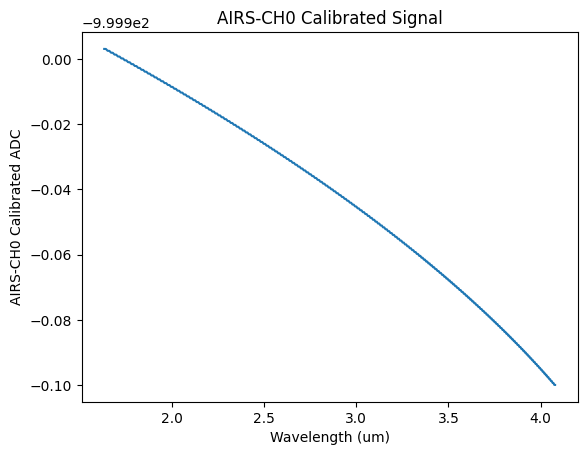

In [10]:
plt.plot(axis_info['AIRS-CH0-axis2-um'], axis_info['AIRS-CH0-axis0-h-calibrated'])
plt.xlabel("Wavelength (um)")
plt.ylabel("AIRS-CH0 Calibrated ADC")
plt.title("AIRS-CH0 Calibrated Signal")
plt.show()


In [11]:
planet_spectrum = np.concatenate([
    axis_info['FGS1-axis0-h-calibrated'].values,
    axis_info['AIRS-CH0-axis0-h-calibrated'].values
])

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


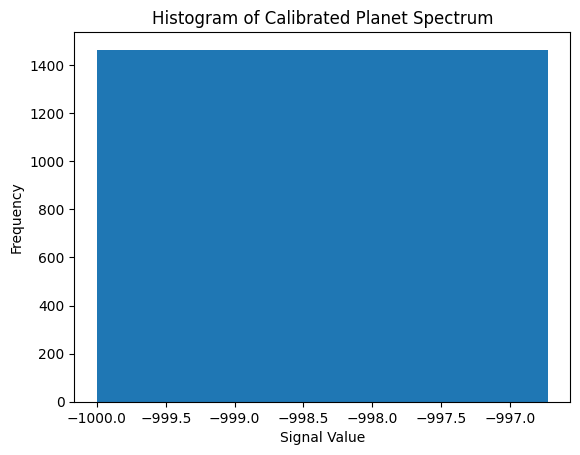

In [12]:
plt.hist(planet_spectrum, bins=100)
plt.title("Histogram of Calibrated Planet Spectrum")
plt.xlabel("Signal Value")
plt.ylabel("Frequency")
plt.show()


In [13]:
mu_user = planet_spectrum  
sigma_user = np.full_like(planet_spectrum, fill_value=1e-4)  

submission = pd.DataFrame({
    'planet_id': ['planet_0000'], 
    **{f'mu_{i}': [mu] for i, mu in enumerate(mu_user)},
    **{f'sigma_{i}': [sigma] for i, sigma in enumerate(sigma_user)}
})
submission.to_csv('submission.csv', index=False)
